# VAR

In [1]:
import pandas as pd

df = pd.read_excel('covid_jakarta_date.xls')

In [2]:
df.head(5)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,139,-120,...,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.5128,3.5641
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,139,-118,...,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.4878,3.3902
2,2020-03-03,DKI Jakarta,2,0,0,2,43,20,139,-116,...,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.4651,3.2326
3,2020-03-04,DKI Jakarta,2,0,0,2,45,20,139,-114,...,10846145,16334.31,106.836118,-6.204699,0.18,4.15,0.00,1.84,0.4444,3.0889
4,2020-03-05,DKI Jakarta,0,1,0,-1,45,21,139,-115,...,10846145,16334.31,106.836118,-6.204699,0.00,4.15,0.09,1.94,0.4667,3.0889


In [3]:
df.isna().sum()

Date                          0
Location                      0
New Cases                     0
New Deaths                    0
New Recovered                 0
New Active Cases              0
Total Cases                   0
Total Deaths                  0
Total Recovered               0
Total Active Cases            0
Country                       0
Continent                     0
Island                        0
Time Zone                     0
Total Regencies               0
Total Cities                  0
Total Districts               0
Total Urban Villages          0
Total Rural Villages        496
Area (km2)                    0
Population                    0
Population Density            0
Longitude                     0
Latitude                      0
New Cases per Million         0
Total Cases per Million       0
New Deaths per Million        0
Total Deaths per Million      0
Case Fatality Rate            0
Case Recovered Rate           0
dtype: int64

In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
df.drop(columns=['Location',
                'Country', 'Continent', 'Island', 'Time Zone', 
                'Total Cities', 'Total Regencies', 'Total Districts', 'Total Urban Villages',
                'Total Rural Villages', 'Area (km2)', 'Longitude', 'Latitude'],inplace=True)

In [6]:
df.tail(10)

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Population Density,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate
486,2021-06-30,7680,71,3522,4087,543465,8399,464791,70275,10846145,16334.31,708.09,50106.74,6.55,774.38,0.0155,0.8552
487,2021-07-01,7541,46,3527,3968,551006,8445,468318,74243,10846145,16334.31,695.27,50802.01,4.24,778.62,0.0153,0.8499
488,2021-07-02,9399,70,5013,4316,560405,8515,473331,78559,10846145,16334.31,866.58,51668.59,6.45,785.07,0.0152,0.8446
489,2021-07-03,9701,16,5682,4003,570106,8531,479013,82562,10846145,16334.31,894.42,52563.01,1.48,786.55,0.0150,0.8402
490,2021-07-04,10485,66,5816,4603,580591,8597,484829,87165,10846145,16334.31,966.70,53529.71,6.09,792.63,0.0148,0.8351
491,2021-07-05,10902,120,6597,4185,591493,8717,491426,91350,10846145,16334.31,1005.15,54534.86,11.06,803.70,0.0147,0.8308
492,2021-07-06,9439,137,6100,3202,600932,8854,497526,94552,10846145,16334.31,870.26,55405.12,12.63,816.33,0.0147,0.8279
493,2021-07-07,9365,142,3655,5568,610297,8996,501181,100120,10846145,16334.31,863.44,56268.56,13.09,829.42,0.0147,0.8212
494,2021-07-08,12974,136,10857,1981,623271,9132,512038,102101,10846145,16334.31,1196.19,57464.75,12.54,841.96,0.0147,0.8215
495,2021-07-09,13112,138,15022,-2048,636383,9270,527060,100053,10846145,16334.31,1208.91,58673.66,12.72,854.68,0.0146,0.8282


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

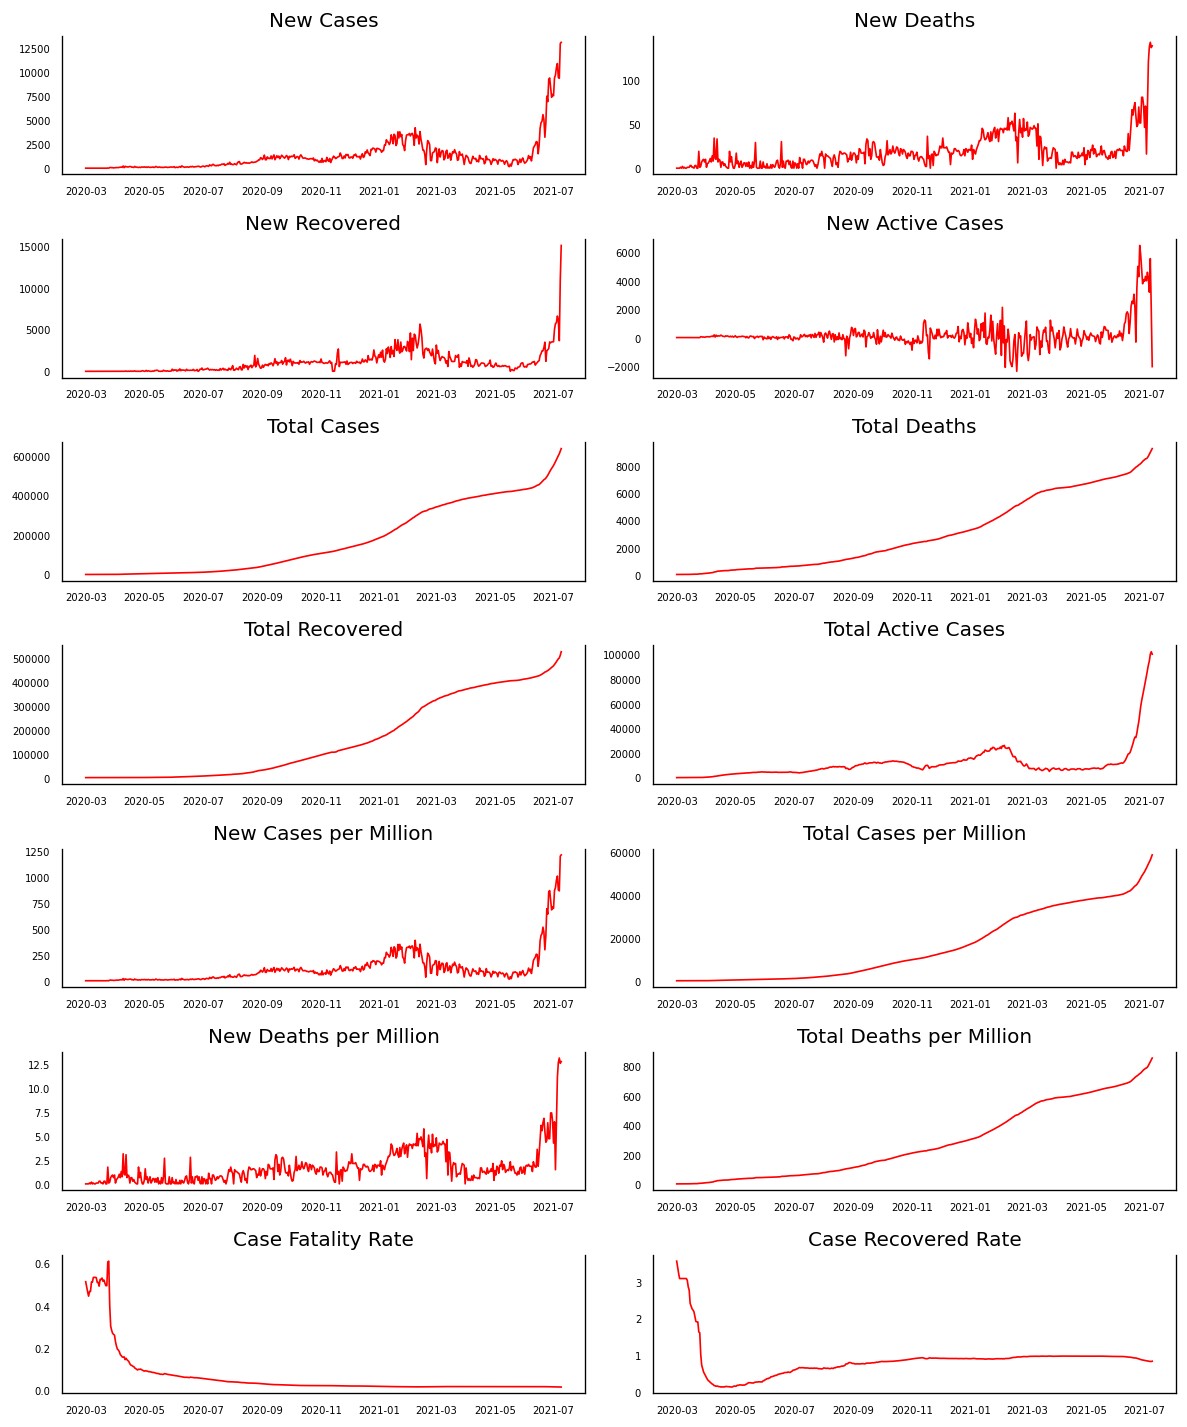

In [8]:
df_nodate = df.drop(columns=['Date', 'Population', 'Population Density'])
df_nodate = df_nodate.set_index(df.Date)

fig, axes = plt.subplots(nrows=7, ncols=2, dpi=120, figsize=(10,12))
for i, ax in enumerate(axes.flatten()):
    data = df_nodate[df_nodate.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_nodate.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [9]:
df_nodate2 = df.drop(columns=['Date', 'Population', 'Population Density'])

In [10]:
df_nodate2.head(10)

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate
0,2,0,0,2,39,20,139,-120,0.18,3.60,0.00,1.84,0.5128,3.5641
1,2,0,0,2,41,20,139,-118,0.18,3.78,0.00,1.84,0.4878,3.3902
2,2,0,0,2,43,20,139,-116,0.18,3.96,0.00,1.84,0.4651,3.2326
3,2,0,0,2,45,20,139,-114,0.18,4.15,0.00,1.84,0.4444,3.0889
4,0,1,0,-1,45,21,139,-115,0.00,4.15,0.09,1.94,0.4667,3.0889
5,0,0,0,0,45,21,139,-115,0.00,4.15,0.00,1.94,0.4667,3.0889
6,0,2,0,-2,45,23,139,-117,0.00,4.15,0.18,2.12,0.5111,3.0889
7,0,0,0,0,45,23,139,-117,0.00,4.15,0.00,2.12,0.5111,3.0889
8,0,1,0,-1,45,24,139,-118,0.00,4.15,0.09,2.21,0.5333,3.0889
9,0,0,0,0,45,24,139,-118,0.00,4.15,0.00,2.21,0.5333,3.0889


In [11]:
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_nodate2[['New Cases', 'New Deaths']], variables = df_nodate2[['New Cases', 'New Deaths']].columns)

#Kesimpulan: keduanya saling memengaruhi

,New Cases_x,New Deaths_x
New Cases_y,1.0,0.0
New Deaths_y,0.0,1.0


In [12]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_nodate2[['New Cases', 'New Deaths']])

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
New Cases ::  77.07     > 12.3212   =>   True
New Deaths ::  10.73     > 4.1296    =>   True


In [13]:
df = df_nodate2[['New Cases', 'New Deaths']]
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape) 

(492, 2)
(4, 2)


In [14]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [15]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5143
 No. Lags Chosen       = 17
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.8892. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2132
 No. Lags Chosen       = 7
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.9369. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [16]:
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7443
 No. Lags Chosen       = 16
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.4084. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.1743
 No. Lags Chosen       = 6
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [17]:
df_differenced = df_differenced.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1079
 No. Lags Chosen       = 15
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7245
 No. Lags Chosen       = 18
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [18]:
model = VAR(df_differenced)
for i in range(1,25):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  17.52659242290401
BIC :  17.578032453449712
FPE :  40898041.33665711
HQIC:  17.54679651311642 

Lag Order = 2
AIC :  17.087442535626714
BIC :  17.173309654599116
FPE :  26362259.20814439
HQIC:  17.12117147167156 

Lag Order = 3
AIC :  16.943835641850086
BIC :  17.064237485224126
FPE :  22835790.042807687
HQIC:  16.991134059134417 

Lag Order = 4
AIC :  16.867606560870417
BIC :  17.022651324718584
FPE :  21159827.868388627
HQIC:  16.928519331156643 

Lag Order = 5
AIC :  16.691549778764976
BIC :  16.881346223302348
FPE :  17744130.43250425
HQIC:  16.76612201188464 

Lag Order = 6
AIC :  16.193589689356582
BIC :  16.41824714302318
FPE :  10784446.734876866
HQIC:  16.281866734939907 

Lag Order = 7
AIC :  16.06332397014373
BIC :  16.322952333724636
FPE :  9467391.040260015
HQIC:  16.165351419365066 



C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 8
AIC :  15.998492956451482
BIC :  16.293202707235135
FPE :  8873248.294752417
HQIC:  16.1143166437909 

Lag Order = 9
AIC :  15.926044076489156
BIC :  16.255946272464247
FPE :  8253321.911168171
HQIC:  16.05571008151029 

Lag Order = 10
AIC :  15.911120512250704
BIC :  16.276326796342122
FPE :  8131307.51299317
HQIC:  16.054675161395103 

Lag Order = 11
AIC :  15.890267990095344
BIC :  16.290890594439606
FPE :  7963791.827251363
HQIC:  16.047757858493444 

Lag Order = 12
AIC :  15.895634021172997
BIC :  16.33178577143361
FPE :  8006986.9680667
HQIC:  16.067105934471964 

Lag Order = 13
AIC :  15.865304271288064
BIC :  16.337098591011273
FPE :  7768180.674976987
HQIC:  16.05080530749665 

Lag Order = 14
AIC :  15.861406666087012
BIC :  16.368957581098403
FPE :  7738425.928082901
HQIC:  16.060984157437634 

Lag Order = 15
AIC :  15.862743888657947
BIC :  16.406166031500366
FPE :  7749318.568274398
HQIC:  16.07644542348621 

Lag Order = 16
AIC :  15.86654284847473
BIC :  16.4

In [19]:
model = VAR(df_differenced)
x = model.select_order(maxlags=14)
x.summary()

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,18.40,18.42,9.782e+07,18.41
1,17.58,17.63,4.318e+07,17.60
2,17.14,17.23,2.773e+07,17.17
3,16.99,17.11,2.393e+07,17.04
4,16.91,17.07,2.209e+07,16.97
5,16.73,16.92,1.845e+07,16.81
6,16.23,16.46,1.117e+07,16.32
7,16.09,16.36,9.763e+06,16.20
8,16.03,16.32,9.112e+06,16.14
9,15.95,16.28*,8.440e+06,16.08


In [20]:
model_fitted = model.fit(14)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Oct, 2021
Time:                     20:14:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.3690
Nobs:                     476.000    HQIC:                   16.0610
Log likelihood:          -5067.84    FPE:                7.73843e+06
AIC:                      15.8614    Det(Omega_mle):     6.87518e+06
--------------------------------------------------------------------
Results for equation New Cases
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 11.461620        15.480220            0.740           0.459
L1.New Cases          -1.328441         0.048184          -27.570           0.000
L1.New Deaths         -3.823699         2.108194    

In [21]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

New Cases : 1.99
New Deaths : 1.97


In [22]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

14


array([[-1.225e+03, -2.000e+01],
       [ 3.265e+03,  3.000e+00],
       [ 1.340e+03,  1.400e+01],
       [-3.383e+03,  1.800e+01],
       [ 2.908e+03, -3.800e+01],
       [-2.215e+03,  1.800e+01],
       [-1.167e+03,  2.900e+01],
       [ 7.600e+01, -2.900e+01],
       [ 1.270e+03, -9.000e+00],
       [-4.400e+02, -1.600e+01],
       [ 1.997e+03,  4.900e+01],
       [-1.556e+03, -7.800e+01],
       [ 4.820e+02,  1.040e+02],
       [-3.670e+02,  4.000e+00]])

In [23]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,New Cases_2d,New Deaths_2d
492,-804.377416,-81.457605
493,-648.417161,19.966500
494,2436.307429,4.958664
495,-953.680804,-2.610755


In [24]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [25]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['New Cases_forecast', 'New Deaths_forecast']]

,New Cases_forecast,New Deaths_forecast
492,10514.622584,92.542395
493,9478.828006,85.051290
494,10879.340857,82.518849
495,11326.172905,77.375654


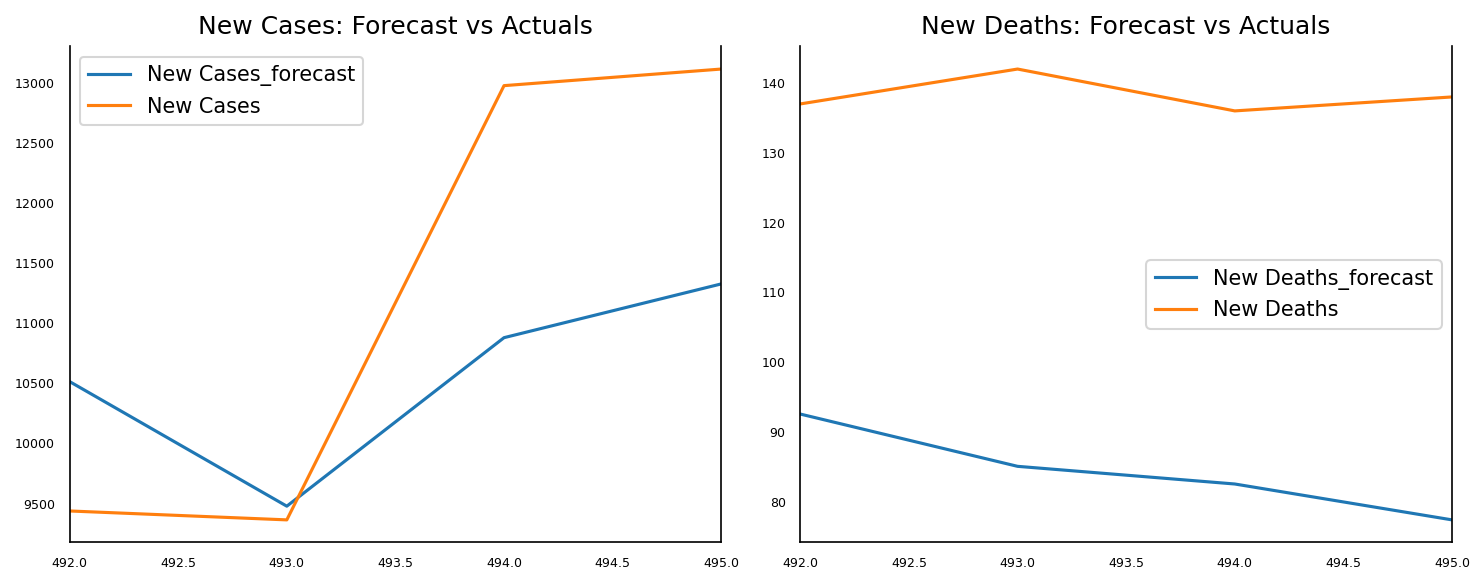

In [26]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,4))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [27]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: New Cases')
accuracy_prod = forecast_accuracy(df_results['New Cases_forecast'].values, df_test['New Cases'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: New Deaths')
accuracy_prod = forecast_accuracy(df_results['New Deaths_forecast'].values, df_test['New Deaths'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: New Cases
mape :  0.1059
me :  -672.7589
mae :  1267.4842
mpe :  -0.0429
rmse :  1478.7407
corr :  0.8246
minmax :  0.103

Forecast Accuracy of: New Deaths
mape :  0.3895
me :  -53.878
mae :  53.878
mpe :  -0.3895
rmse :  54.2107
corr :  -0.0351
minmax :  0.3895


C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


# Fit to all data

In [28]:
df_train = df

In [29]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.4382
 No. Lags Chosen       = 17
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.9829. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.1147
 No. Lags Chosen       = 6
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [30]:
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.3545
 No. Lags Chosen       = 16
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.9174. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.154
 No. Lags Chosen       = 5
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [31]:
df_differenced = df_differenced.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "New Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.2289
 No. Lags Chosen       = 13
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "New Deaths" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3177
 No. Lags Chosen       = 18
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [32]:
model = VAR(df_differenced)
x = model.select_order(maxlags=14)
x.summary()

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,18.56,18.57,1.144e+08,18.56
1,17.78,17.83,5.249e+07,17.80
2,17.30,17.39,3.267e+07,17.34
3,17.15,17.27,2.814e+07,17.20
4,17.06,17.22,2.573e+07,17.12
5,16.84,17.03,2.062e+07,16.92
6,16.39,16.61,1.311e+07,16.48
7,16.25,16.51,1.144e+07,16.36
8,16.19,16.48,1.071e+07,16.30
9,16.14,16.47*,1.023e+07,16.27


In [33]:
model_fitted = model.fit(14)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Oct, 2021
Time:                     20:14:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.5010
Nobs:                     480.000    HQIC:                   16.1949
Log likelihood:          -5143.37    FPE:                8.85888e+06
AIC:                      15.9966    Det(Omega_mle):     7.87818e+06
--------------------------------------------------------------------
Results for equation New Cases
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 16.216791        15.988747            1.014           0.310
L1.New Cases          -1.304033         0.047637          -27.374           0.000
L1.New Deaths         -3.250157         2.033800    

In [34]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

New Cases : 1.99
New Deaths : 2.01


In [35]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

14


array([[ 2908.,   -38.],
       [-2215.,    18.],
       [-1167.,    29.],
       [   76.,   -29.],
       [ 1270.,    -9.],
       [ -440.,   -16.],
       [ 1997.,    49.],
       [-1556.,   -78.],
       [  482.,   104.],
       [ -367.,     4.],
       [-1880.,   -37.],
       [ 1389.,   -12.],
       [ 3683.,   -11.],
       [-3471.,     8.]])

In [36]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=90)
df_forecast = pd.DataFrame(fc, columns=df.columns + '_2d')
df_forecast

,New Cases_2d,New Deaths_2d
0,-163.325076,-20.153355
1,1023.348700,35.146403
2,-1510.744073,-2.579911
3,-1080.280861,7.265470
4,2928.269230,-31.226002
...,...,...
85,-920.898567,2.597568
86,430.103230,-10.326697
87,1411.858908,-14.510671
88,1260.774410,-8.689367


In [37]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['New Cases_forecast', 'New Deaths_forecast']]

,New Cases_forecast,New Deaths_forecast
0,13086.674924,119.846645
1,14084.698548,136.839693
2,13571.978099,151.252831
3,11978.976789,172.931438
4,13314.244709,163.384043
...,...,...
85,52861.064268,801.340338
86,52115.270914,816.097108
87,52781.336468,816.343208
88,54708.176433,807.899941


In [43]:
dateforecast = pd.date_range(start='2021-07-10', periods = 90)

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


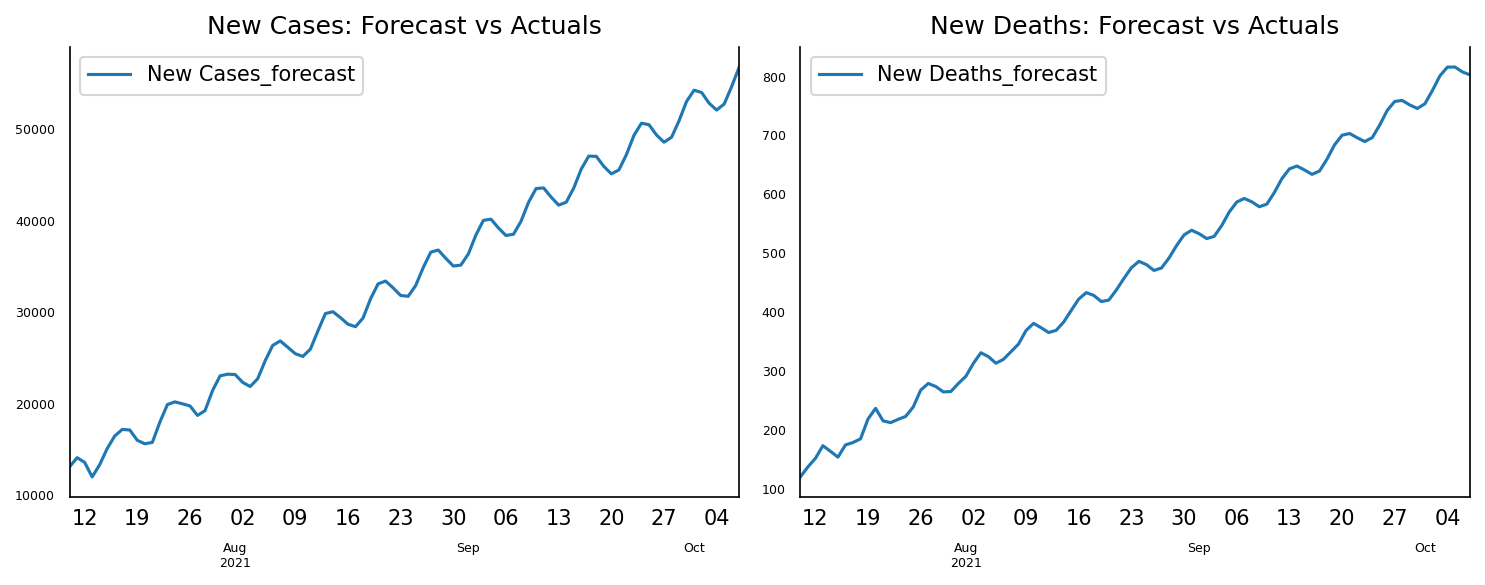

In [47]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,4))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Simple MA for Every Column

In [49]:
df_train = df_nodate2[['New Cases', 'New Deaths']]

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

import warnings
warnings.filterwarnings('ignore')

for j in range(1,20):
    model = ARIMA(df_train['New Cases'], order=(0, 0, j))
    result = model.fit()
    print('Lag Order =', j)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  8323.807056816398
BIC :  8336.426784596573
HQIC:  8328.760712996316 

Lag Order = 2
AIC :  8022.38902590868
BIC :  8039.21532961558
HQIC:  8028.993900815237 

Lag Order = 3
AIC :  7907.0050315547915
BIC :  7928.037911188416
HQIC:  7915.261125187988 

Lag Order = 4
AIC :  7945.742351705336
BIC :  7970.981807265685
HQIC:  7955.649664065171 



KeyboardInterrupt: 

In [51]:
model_selected_MA = ARIMA(df_train['New Cases'], order=(0, 0, 6))
result_MA = model_selected_MA.fit()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

import warnings
warnings.filterwarnings('ignore')

for j in range(1,30):
    model = ARIMA(df_train['New Deaths'], order=(0, 0, j))
    result = model.fit()
    print('Lag Order =', j)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('HQIC: ', result.hqic, '\n')

In [52]:
model_selected_MAdeath = ARIMA(df_train['New Deaths'], order=(0, 0, 27))
result_MAdeath = model_selected_MAdeath.fit()

In [53]:
forecast_newcasesMA = result_MA.forecast(y=df_train.values[-6:], steps=90)
df_forecastnewcases = pd.DataFrame(forecast_newcasesMA)
df_forecastnewcases = df_forecastnewcases.rename(columns = {'predicted_mean': 'New Cases_forecast'})
df_forecastnewcases

,New Cases_forecast
496,12473.231651
497,11757.491738
498,9361.340200
499,5980.020737
500,3079.875806
...,...
581,1283.998847
582,1283.998847
583,1283.998847
584,1283.998847


In [54]:
forecast_newdeathsMA = result_MAdeath.forecast(y=df_train.values[-27:], steps=90)
df_forecastnewdeaths = pd.DataFrame(forecast_newdeathsMA)
df_forecastnewdeaths = df_forecastnewdeaths.rename(columns = {'predicted_mean': 'New Deaths_forecast'})
df_forecastnewdeaths

,New Deaths_forecast
496,107.310210
497,97.640783
498,88.699814
499,97.459205
500,89.202046
...,...
581,18.708987
582,18.708987
583,18.708987
584,18.708987


In [55]:
df_result = pd.concat([df_forecastnewcases, df_forecastnewdeaths], axis = 1)
df_result

,New Cases_forecast,New Deaths_forecast
496,12473.231651,107.310210
497,11757.491738,97.640783
498,9361.340200,88.699814
499,5980.020737,97.459205
500,3079.875806,89.202046
...,...,...
581,1283.998847,18.708987
582,1283.998847,18.708987
583,1283.998847,18.708987
584,1283.998847,18.708987


In [56]:
df_result = df_result.set_index(dateforecast)

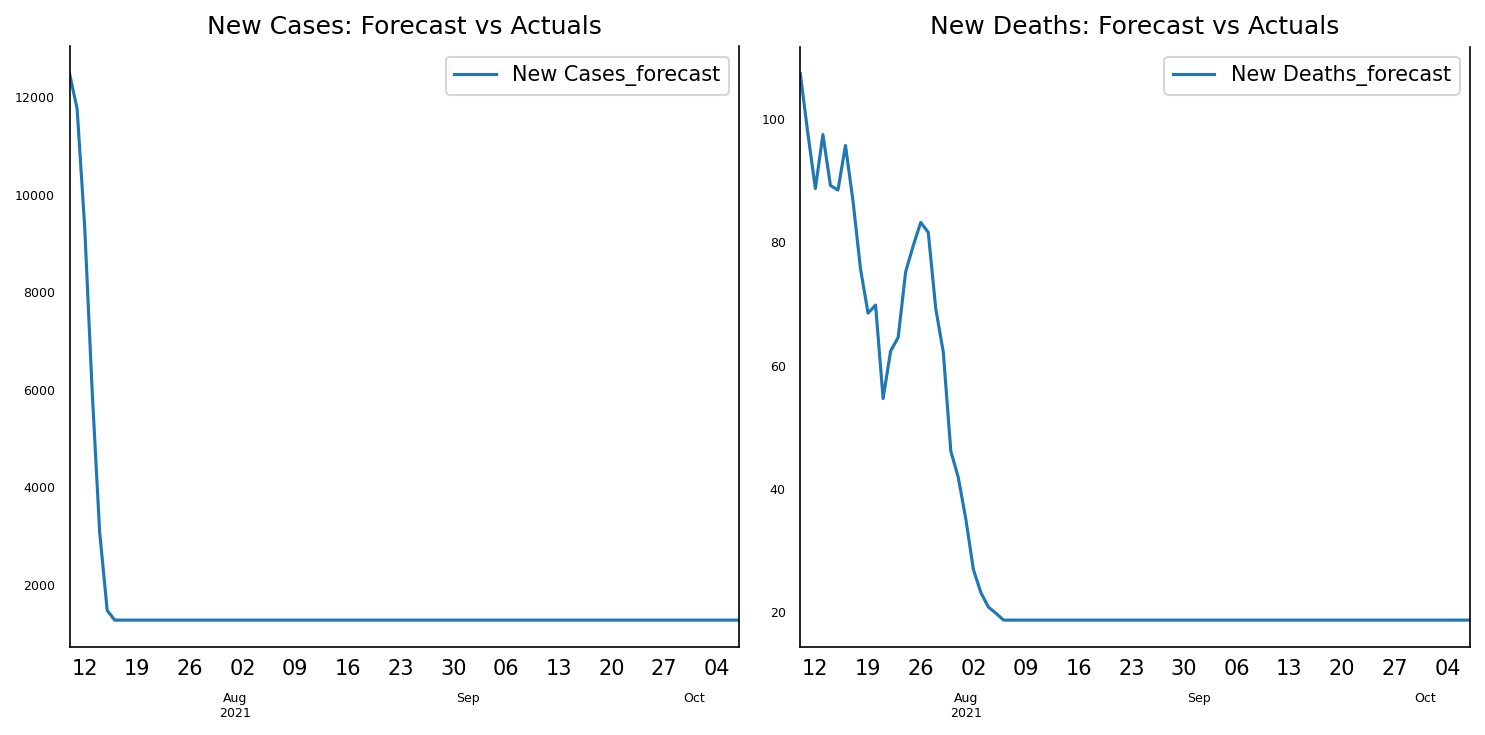

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(10,5))
for i, (col,ax) in enumerate(zip(df_nodate2.columns, axes.flatten())):
    df_result[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();